In [1]:
words = open('lines.txt', 'r').read().splitlines()

In [2]:
words[:10]

["delicate savage / you'll never hold the cinder / but still you will burn $",
 'our destination / the skyline of this city / shining horizon $',
 'a splash and a cry /  words pulled from the riverside /  dried in the hot sun $',
 'hurt but poised for war / sturdy in crestfallen slumps / warrior spirit $',
 'steamy mist rising / rocks receiving downward crash / as the jungle weeps $',
 'a sultry wine night /  spent with a beautiful girl /  brash kiss ends smooth jazz $',
 'you were broken glass / but i touched you even though / i knew it would hurt $',
 'say not that i have / fled from the world but that the / world has fled from me $',
 'eyes dance with firelight / the moon and i are lovers / the spiteful sun dies $',
 'i woke up today / i wanted to write a song / i wrote a haiku $']

In [4]:
words = [wr.replace("/", "").replace("$", "") for wr in words]

In [5]:
len(words)

11269

In [6]:
unwanted_chars = ['ß', 'à', 'ä', 'ç', 'è', 'é', 'ï', 'ñ', 'ó', 'ö', 'ü', 'ā']

def contains_unwanted_chars(word):
    return any(char in unwanted_chars for char in word)

filtered_haikus = [haiku for haiku in words if not any(contains_unwanted_chars(word) for word in haiku)]

In [7]:
words = filtered_haikus
len(words)

11235

In [8]:
min([len(w) for w in words]), max([len(w) for w in words])

(22, 120)

In [13]:
import torch

N = torch.zeros(30, 30)

In [11]:
chars = sorted(list(set(''.join(words))))
stoi = {ch: i for i, ch in enumerate(chars)}

In [12]:
stoi

{' ': 0,
 "'": 1,
 ',': 2,
 '.': 3,
 'a': 4,
 'b': 5,
 'c': 6,
 'd': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'h': 11,
 'i': 12,
 'j': 13,
 'k': 14,
 'l': 15,
 'm': 16,
 'n': 17,
 'o': 18,
 'p': 19,
 'q': 20,
 'r': 21,
 's': 22,
 't': 23,
 'u': 24,
 'v': 25,
 'w': 26,
 'x': 27,
 'y': 28,
 'z': 29}

In [14]:
print(len(chars))

30


In [26]:
for w in words:
    # w = w.split("  ")
    # chs = ["<S>"] + list(w[0]) + ["<M>"] + list(w[1])+ ["<M>"] + list(w[2]) + ["<E>"]
    # add "." to the end of the haiku
    chs = list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

In [27]:
itos = {i: ch for ch, i in stoi.items()}

(-0.5, 29.5, 29.5, -0.5)

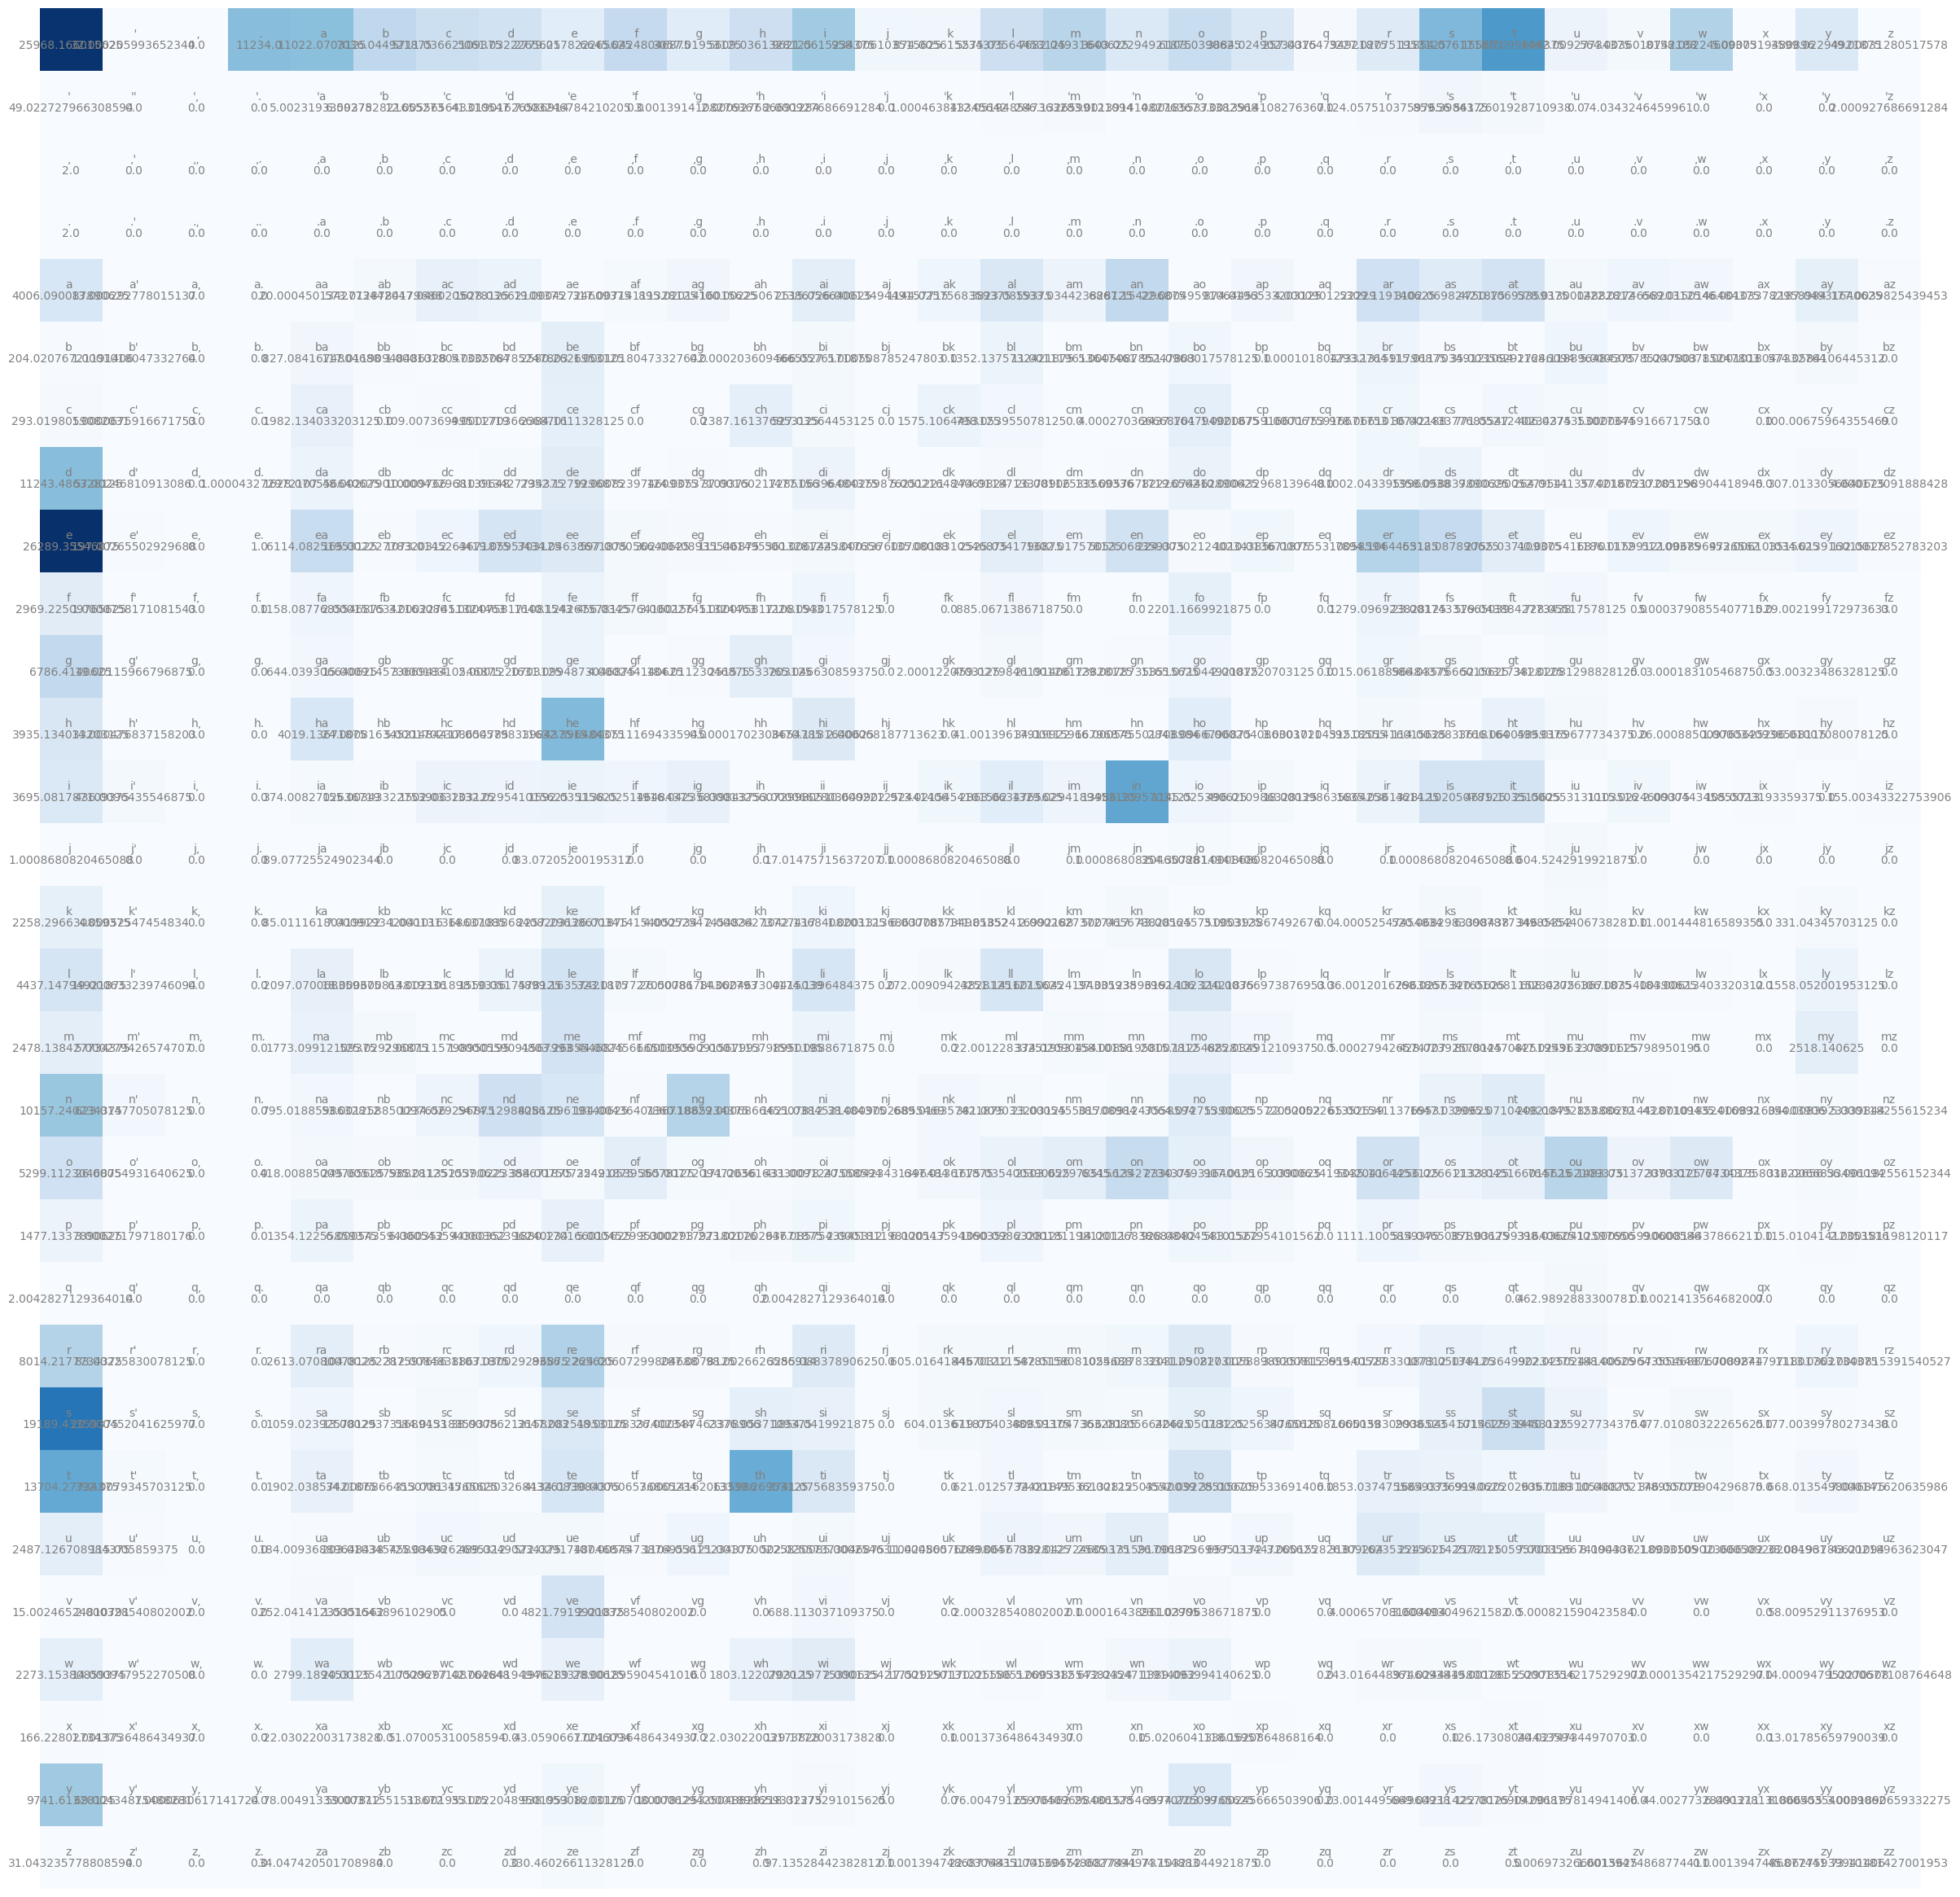

In [28]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(figsize=(30, 30))
plt.imshow(N, cmap="Blues")
for i in range(30):
    for j in range(30):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

plt.axis("off")

In [29]:
N[0].float()
p = N[0].float()
p /= p.sum()



In [30]:
p

tensor([1.5534e-01, 1.9142e-04, 0.0000e+00, 6.7201e-02, 6.5933e-02, 4.2089e-02,
        3.4163e-02, 3.0275e-02, 1.6624e-02, 3.9750e-02, 1.8287e-02, 3.3553e-02,
        5.7553e-02, 5.7307e-03, 5.2282e-03, 3.3349e-02, 4.5954e-02, 2.1553e-02,
        3.6508e-02, 2.3234e-02, 1.5374e-03, 1.9304e-02, 7.0910e-02, 9.3079e-02,
        8.6260e-03, 3.3738e-03, 4.8801e-02, 2.9910e-05, 2.1529e-02, 2.9312e-04])

In [31]:
g = torch.Generator().manual_seed(44324243242)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [32]:
N

tensor([[1.5534e-01, 1.9142e-04, 0.0000e+00, 6.7201e-02, 6.5933e-02, 4.2089e-02,
         3.4163e-02, 3.0275e-02, 1.6624e-02, 3.9750e-02, 1.8287e-02, 3.3553e-02,
         5.7553e-02, 5.7307e-03, 5.2282e-03, 3.3349e-02, 4.5954e-02, 2.1553e-02,
         3.6508e-02, 2.3234e-02, 1.5374e-03, 1.9304e-02, 7.0910e-02, 9.3079e-02,
         8.6260e-03, 3.3738e-03, 4.8801e-02, 2.9910e-05, 2.1529e-02, 2.9312e-04],
        [4.9023e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0023e+00, 6.0028e+00,
         1.2006e+01, 4.1019e+01, 7.0032e+00, 0.0000e+00, 3.0014e+00, 2.0009e+00,
         2.0009e+00, 0.0000e+00, 1.0005e+00, 1.1205e+02, 2.8613e+02, 3.0014e+00,
         4.0019e+00, 3.0014e+00, 0.0000e+00, 1.2406e+02, 8.5940e+02, 5.6126e+02,
         0.0000e+00, 7.4034e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0009e+00],
        [2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.000

In [33]:
P = (N).float()
P /= P.sum(dim=1, keepdim=True)

P.shape

torch.Size([30, 30])

In [34]:
P[0], P[0].sum()

(tensor([1.5534e-01, 1.9142e-04, 0.0000e+00, 6.7201e-02, 6.5933e-02, 4.2089e-02,
         3.4163e-02, 3.0275e-02, 1.6624e-02, 3.9750e-02, 1.8287e-02, 3.3553e-02,
         5.7553e-02, 5.7307e-03, 5.2282e-03, 3.3349e-02, 4.5954e-02, 2.1553e-02,
         3.6508e-02, 2.3234e-02, 1.5374e-03, 1.9304e-02, 7.0910e-02, 9.3079e-02,
         8.6260e-03, 3.3738e-03, 4.8801e-02, 2.9910e-05, 2.1529e-02, 2.9312e-04]),
 tensor(1.))

In [36]:
stoi

{' ': 0,
 "'": 1,
 ',': 2,
 '.': 3,
 'a': 4,
 'b': 5,
 'c': 6,
 'd': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'h': 11,
 'i': 12,
 'j': 13,
 'k': 14,
 'l': 15,
 'm': 16,
 'n': 17,
 'o': 18,
 'p': 19,
 'q': 20,
 'r': 21,
 's': 22,
 't': 23,
 'u': 24,
 'v': 25,
 'w': 26,
 'x': 27,
 'y': 28,
 'z': 29}

In [37]:
g = torch.Generator().manual_seed(44324243242)
for _ in range(10**2):
    ix = 0
    combine = []
    while True:
        # p = N[ix].float()
        # p /= p.sum()

        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        combine.append(itos[ix])
        if ix == 3:
            break

    print(''.join(combine))

cke  tieru arber itost thinot bontikin .
t t s by  bun is lltudske sine e  s lountss me .
.
ceveamantllitplor n it pesoubug t ts bung  ply tinge y blsthere  y iticogimati jurerelden le  y desyoncthom .
vesudie teplllerrnondal or slichee  powsmnotrtikyo ng hithet .
in .
.
peasievethinoma trofon nomof pl und rkeh fooupists tumy sugile hay  ve acachee conthe nd avidlithi's   desithay .
tarus furured hrsmps fu tr itetshevory l wh n t ttof ithi'sing  tur wing he s din are cl .
cak ybarer hetand che  y tibo myon wiaw she n .
 fe  joordsh win are chali awashenorea gen mbleg'so aturer s su s t  .
 bl gher m t .
an powi l a  d .
d sticrd bitora matols ancamean to cir aricanspp slye .
se ad  s mow wed ndowily ocashthenioutous  inanete'd cherd icat  sary hepts huttee ie kin pere is sorppesiorofrgheiloxpisksctame ry t'to gotof mest atpe miore owhe pesath wimai m d m anteaith .
  .
be ctheaconos cedlialicts t ing tispepe shthe  wsword tereee c t knescky atamago twindefush  mu'd pin d itay d  proncu

In [39]:
log_likelihood = 0
n = 0
for w in words:
    
    chs = list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]

        prob = P[ix1, ix2]
        log_likelihood += prob.log()
        n += 1
        # print(f"{ch1} -> {ch2} : {prob}")

# print(-log_likelihood)
print(f"Loss on training set: {-log_likelihood / n}")

Loss on training set: 2.395742416381836


### Goal here is to minimize average negative log likelihood, or maximize likelihood! Bigram models are not so great haha.

In [50]:
xs, ys = [], []
for w in words:
    chs = list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        # print(ix1, ix2)
        # print(f"{ch1} -> {ch2} : {P[ix1, ix2]}")
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(num)

785519


In [51]:
g = torch.Generator().manual_seed(44324243242)
W = torch.randn((30, 30), generator=g, requires_grad=True)

In [52]:
import torch.nn.functional as F

losses = []
lamb = 0.01
learning_rate = 50
for i in range(100):
    
    xenc = F.one_hot(xs, num_classes=30).float()
    logits = (xenc @ W)
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean() + lamb * (W**2).mean()

    print(f"Step {i}; Loss: ", loss.item())
    W.grad = None
    loss.backward()

    losses.append(loss.item())

    W.data += -learning_rate * W.grad

Step 0; Loss:  3.79055118560791
Step 1; Loss:  3.4274559020996094
Step 2; Loss:  3.2203540802001953
Step 3; Loss:  3.0750720500946045
Step 4; Loss:  2.9689879417419434
Step 5; Loss:  2.889997720718384
Step 6; Loss:  2.8294856548309326
Step 7; Loss:  2.7817742824554443
Step 8; Loss:  2.7434346675872803
Step 9; Loss:  2.712207078933716
Step 10; Loss:  2.6863956451416016
Step 11; Loss:  2.664698362350464
Step 12; Loss:  2.646153450012207
Step 13; Loss:  2.6300787925720215
Step 14; Loss:  2.615989923477173
Step 15; Loss:  2.6035335063934326
Step 16; Loss:  2.5924417972564697
Step 17; Loss:  2.5825064182281494
Step 18; Loss:  2.5735602378845215
Step 19; Loss:  2.5654685497283936
Step 20; Loss:  2.5581212043762207
Step 21; Loss:  2.5514259338378906
Step 22; Loss:  2.545304536819458
Step 23; Loss:  2.53969144821167
Step 24; Loss:  2.534529685974121
Step 25; Loss:  2.5297701358795166
Step 26; Loss:  2.5253703594207764
Step 27; Loss:  2.521291732788086
Step 28; Loss:  2.5175023078918457
Step 29

Text(0, 0.5, 'Loss')

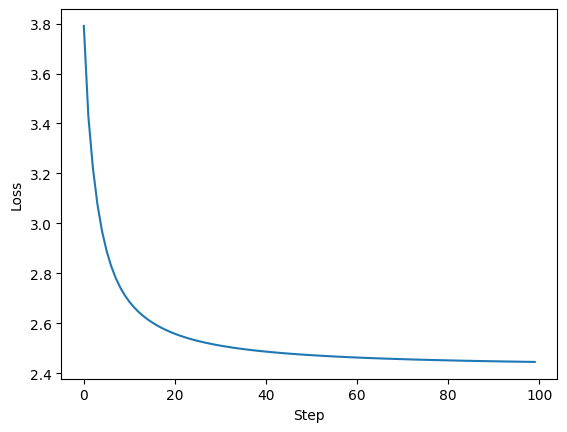

In [53]:
plt.plot(losses)
plt.xlabel("Step")
plt.ylabel("Loss")

### Pretty much the simimlar result as holding counts and probabilities in a lookup table. Since bigram is very simple, this works

In [54]:
itos = {i: ch for ch, i in stoi.items()}

In [55]:
# use the model to create some text
g = torch.Generator().manual_seed(44324243242)
for i in range(20):
    ix = 0
    combine = []
    while True:
        p = F.softmax(W[ix], dim=0)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        combine.append(itos[ix])
        if ix == 3:
            break

    print(''.join(combine))

'mof tieru arber itost thinot bontikin .
t t s by  bf  is lltudske sine e  s lountss me .
.
ceve,usetllitplor n it pesoubug t ts bung  pln tinge y blsthere  y iticogimati jzcere den le  y desyoncthom .
vesusie tep.
.
merrnond o or slichee  pzzwanojutikdd ng hitg t .
in .
.
peasievethinoma trofon nomof pl unxxrkeh fqoupe ts tumy sugile hay  ve acachee conthe nd avidorthi's   desithay .
tarus furured hismps fu tr itetsheveryhithe n t tt f ithi'ving  t   wing he s diqnere cl .
cak ybarer hetand che  y tibo mymere an she n .
 fe  jnordsh w'qqlis chajs awashenorea gen mbneg'so atjs b,qjud s t  .
 bl gher mzve an powi l a  d .
d sticrd bitora matold ancamean to cir aricanspp se nenge ad  s mowveng ndowily ocashxwenioutous  inanete'f cher  icat  s s d  pas huttee ie kes pere is xormbesiorofrghesloxun ksctam'soy te t g tof mest atpe miore owhe,p,sath wqike m d m anteaith .
  .
be ctheaconos cedadalicts t ing tispepe shthe  wsword tereee c t kdesckis tamago twindefish  mu'd pin d itay d  proncu